In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('car_prices.csv')
df.head(3)

,car_id,mileage,selling_price
0,A001,126958,9734
1,A002,151867,8775
2,A003,136932,3928


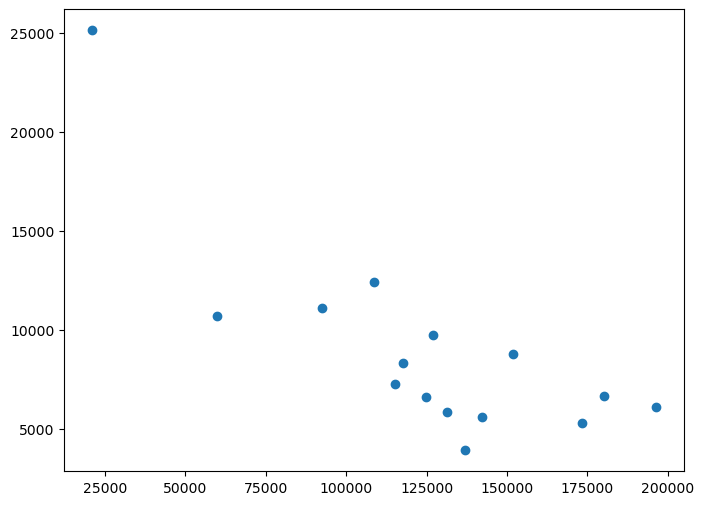

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(df.mileage, df.selling_price)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

x = df['mileage']
y = df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
x.shape, x_test.shape

((15,), (3,))

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
poly.fit_transform(np.array([[1],[2],[3], [4], [5]]))

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [7]:
poly = PolynomialFeatures(degree=2)
x_train = x_train.to_numpy()
x_train = x_train.reshape(-1,1)
x_test = x_test.to_numpy()
x_test = x_test.reshape(-1,1)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [8]:
x_train[:5]


array([[196335],
       [115268],
       [173266],
       [136932],
       [151867]])

In [9]:
x_train_poly[:5]

array([[1.00000000e+00, 1.96335000e+05, 3.85474322e+10],
       [1.00000000e+00, 1.15268000e+05, 1.32867118e+10],
       [1.00000000e+00, 1.73266000e+05, 3.00211068e+10],
       [1.00000000e+00, 1.36932000e+05, 1.87503726e+10],
       [1.00000000e+00, 1.51867000e+05, 2.30635857e+10]])

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test_poly)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(3127791.4428935423, 0.3748265681859163)

<function matplotlib.pyplot.show(close=None, block=None)>

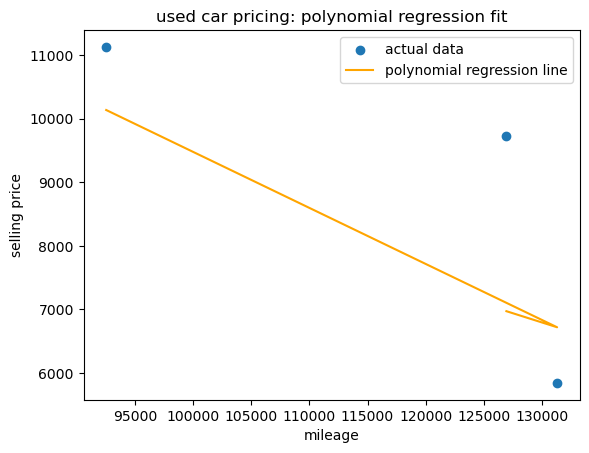

In [12]:
plt.scatter(x_test, y_test, label='actual data')
plt.plot(x_test, y_pred, color='orange', label='polynomial regression line')
plt.title('used car pricing: polynomial regression fit')
plt.xlabel('mileage')
plt.ylabel('selling price')
plt.legend()
plt.show

In [13]:
x_range = np.linspace(df['mileage'].min(), df['mileage'].max(), 300).reshape(-1,1)
x_range_poly = poly.transform(x_range)
y_range_pred = model.predict(x_range_poly)

<function matplotlib.pyplot.show(close=None, block=None)>

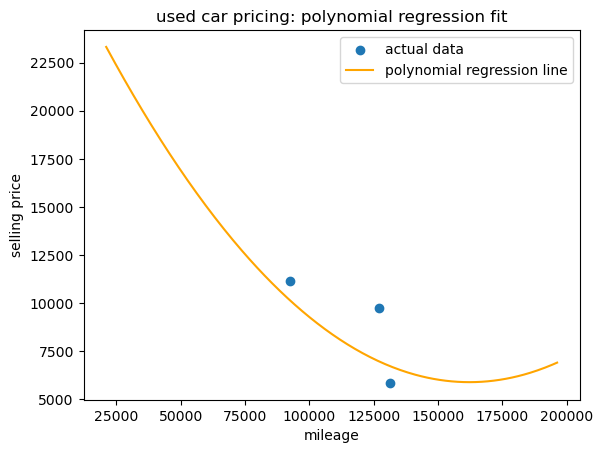

In [14]:
plt.scatter(x_test, y_test, label='actual data')
plt.plot(x_range, y_range_pred, color='orange', label='polynomial regression line')
plt.title('used car pricing: polynomial regression fit')
plt.xlabel('mileage')
plt.ylabel('selling price')
plt.legend()
plt.show

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

x = df['mileage']
y = df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()

x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(2964099.2163721262, 0.4075448721023086)

<function matplotlib.pyplot.show(close=None, block=None)>

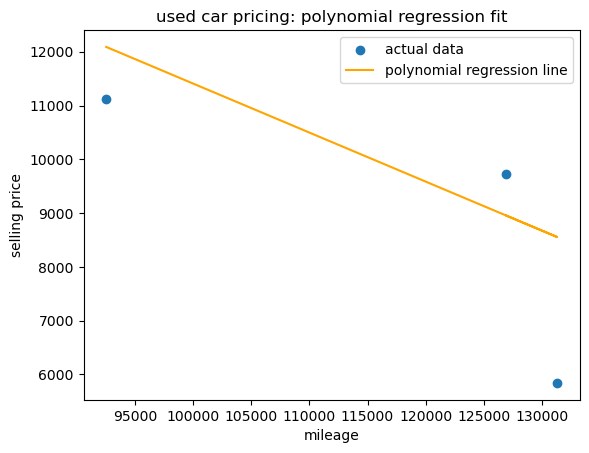

In [19]:
plt.scatter(x_test, y_test, label='actual data')
plt.plot(x_test, y_pred, color='orange', label='polynomial regression line')
plt.title('used car pricing: polynomial regression fit')
plt.xlabel('mileage')
plt.ylabel('selling price')
plt.legend()
plt.show